<a href="https://colab.research.google.com/github/GODxFATHER/Airbnb-Bookings-Analysis-/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>Introduction</b> 

### <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

### <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

### <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
# Importing Libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import plotly.express as px

%matplotlib inline

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 22.2 MB/s 
     |████████████████████████████████| 6.3 MB 57.3 MB/s 
     |████████████████████████████████| 15.4 MB 45.8 MB/s 


In [ ]:
# Configuration for matplotlib graphs

matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (11, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style('darkgrid');

In [ ]:
# Mounting the google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the csv file into pandas dataframe

path_r = "/content/drive/MyDrive/EDA - Capstone Project/Airbnb NYC 2019.csv"
path_n = "/content/drive/MyDrive/DATA_FILES/Airbnb_NYC_2019.csv"
airbnb_df = pd.read_csv(path_r)

In [ ]:
# Displaying the dataframe

airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Checking the shape of dataframe

airbnb_df.shape

(48895, 16)

**The dataset contains 48895 observations and 16 features.**

In [ ]:
# Checking the basic information about the dataframe

airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**The dataset contains a mix of numerical and categorical features.**

**The dataset contain NULL values in "id","name","last_review" and "reviews_per_month" columns.**

In [ ]:
# Counting the number of null values in "name", "host_name", "number_of_reviews" and "last_review" columns

nan_values_cols = ["name", "host_name", "reviews_per_month", "last_review"]
airbnb_df[nan_values_cols].isna().sum()

name                    16
host_name               21
reviews_per_month    10052
last_review          10052
dtype: int64

In [ ]:
airbnb_df.dropna(subset = ["name", "host_name"], inplace = True)        # Dropping the rows having NULL values in "name", "host_name" column

airbnb_df["reviews_per_month"].fillna(0.0, inplace = True)              # Filling NULL values of "reviews_per_month" with 0.0

airbnb_df.drop(labels = "last_review", axis = 1, inplace = True)        # Dropping "last_review" column

In [ ]:
# Descriptive summary of numerical attributes

airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,40.728941,-73.952170,152.740309,7.012444,23.273098,1.091124,7.148369,112.801425
std,1.098289e+07,7.862389e+07,0.054528,0.046159,240.232386,20.019757,44.549898,1.597270,32.964600,131.610962
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,40.690090,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,40.763107,-73.936280,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**The minimum price of a listing is mentioned 0 here but Airbnb starts the listing price with a minimum of $10.**

**Minimum availability of a listing is mentioned 0 here but according to the rental law of New York, the rental property should be available for minimum of 30 days per year.**

**The descriptive summary also tells us ouliers are present in the data.**



In [ ]:
# Changing the minimum price to $10

airbnb_df["price"] = np.where(airbnb_df["price"] < 10, 10, airbnb_df["price"])

In [ ]:
# Changing the minimum availabity to 30 days

airbnb_df["availability_365"] = np.where(airbnb_df["availability_365"] < 30, 30, airbnb_df["availability_365"])

In [ ]:
# Creating a new column "price_category"

airbnb_df["price_category"] = pd.cut(airbnb_df["price"], bins = [10, 100, 200, 10000], include_lowest = True, labels = ["low", "mid", "high"])

In [ ]:
# Displaying the final dataframe after data preparation

airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,mid
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,high
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,mid
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,30,low


## <b>Data Exploration and Visualization</b>

In [ ]:
# Number of listings present in the dataset

num_listings = airbnb_df["id"].count()
num_listings

48858

**There are 48858 listings listed in the dataset.**

## <b>Visualizing listings in New York</b>

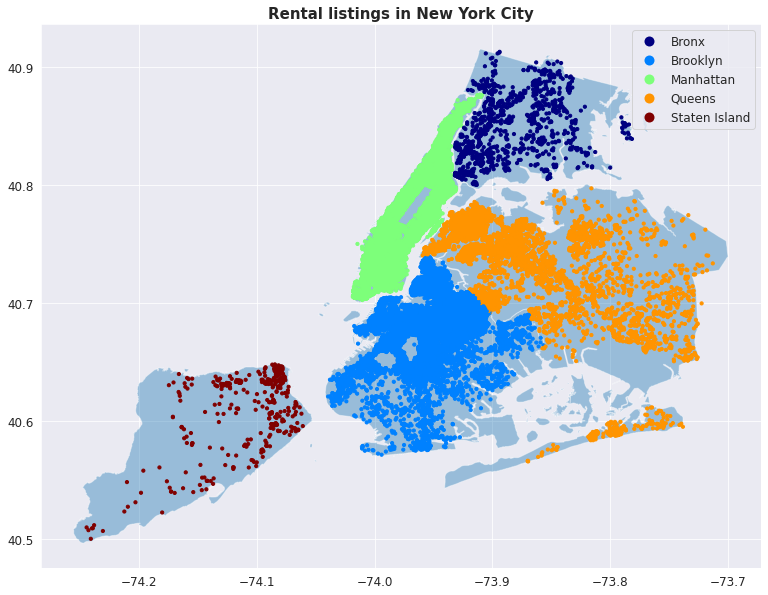

In [ ]:
import geopandas as gpd
from shapely.geometry import Point, Polygon


gdp_path_r ="/content/drive/MyDrive/EDA - Capstone Project/Borough Boundaries/geo_export_0c550535-4d21-4555-aa94-73550209bb00.shp"
gdp_path_n = "/content/drive/MyDrive/DATA_FILES/geopandas_file+/geo_export_0c550535-4d21-4555-aa94-73550209bb00.shp"

# loading the New York city map
street_map = gpd.read_file(gdp_path_n)

# Zip x and y coordinates
geometry = [Point(xy) for xy in zip(airbnb_df["longitude"], airbnb_df["latitude"])]

# Creating Geopandas dataframe
geo_df = gpd.GeoDataFrame(airbnb_df, geometry = geometry)

# Creating figure and axes, assign to subplot
fig, ax = plt.subplots(figsize = (15, 10))

# Add .shp mapfile to axes
street_map.plot(ax = ax, alpha = 0.4)
geo_df.plot(column = "neighbourhood_group", ax = ax, legend = True, markersize = 10, cmap = "jet")

# Adding title to graph
plt.title("Rental listings in New York City", fontsize = 15, fontweight = "bold")

plt.show()

This map plot represent -
* 5 different boroughs in present in New York City.
* location of listing in nieghbourhood group.
* How scattered listing are
  1. manhattan is densiest place.
  2. staten island is most scattered.
  
* Manhattan is central hub as all other bronx are concentrated about Manhattan.






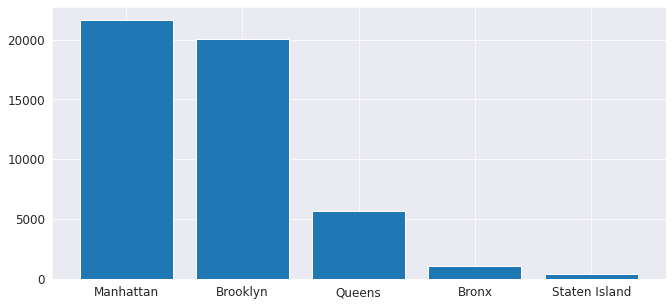

In [ ]:
# Number of listings present in each neighbourhood_group

num_listings_neighbourhood_group = airbnb_df["neighbourhood_group"].value_counts().to_frame()
num_listings_neighbourhood_group.rename(columns = {"neighbourhood_group": "num_of_listings"}, inplace = True)
num_listings_neighbourhood_group.index.name = "neighbourhood_group"

plt.bar(num_listings_neighbourhood_group.index,num_listings_neighbourhood_group.num_of_listings)
plt.show()

###In this dataset 
* Manhattan have most listings by 21643
* staten Island have least listings 

### <b> Visualizing Expensive Rental listings in New York

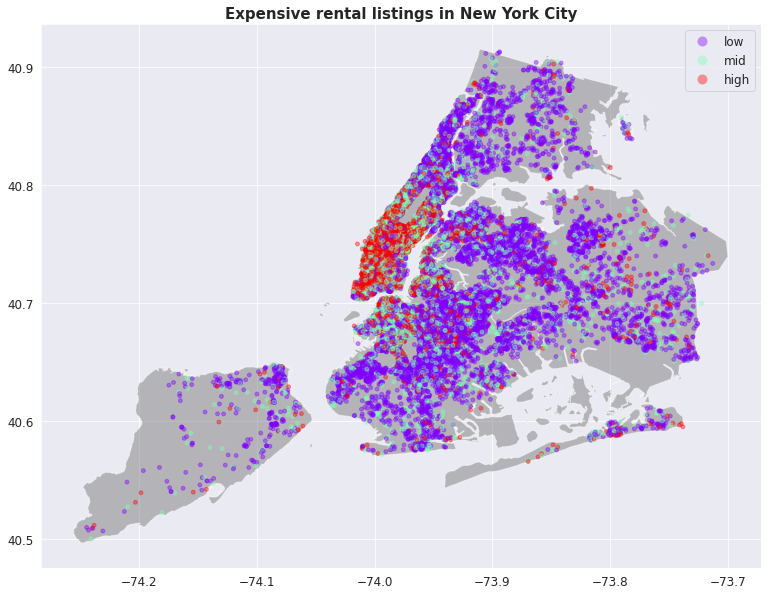

In [ ]:
fig, ax = plt.subplots(figsize = (15, 10))
street_map.plot(ax = ax, alpha = 0.5, color = "grey")
geo_df.plot(column = "price_category", ax = ax, legend = True, markersize = 15, cmap = "rainbow", alpha = .4)
plt.title("Expensive rental listings in New York City", fontsize = 15, fontweight = "bold")

plt.show()

This graph represent -
* Scatter listing location 
* Listing is divided in 3 parts on basis of prize 
  
  1. Low expensive 
  2. Mid expensive
  3. High expensive

* Most of the High expensive listing are present in Manhattan
* Some expensive listing are present along seaside
* Mid Expensice are present nearby manhatttan 
* Low are presnt everywhere.

#### Room type

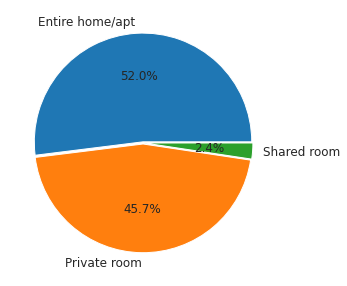

In [ ]:
# Type of room space airbnb host provides

plt.pie(airbnb_df['room_type'].value_counts(), labels = ['Entire home/apt', 'Private room', 'Shared room'], autopct='%1.1f%%', explode = [0.01, 0.01, 0.01]);

here we see 
* private and Entire home/apt constitute major listing in dataset
* shared room constitute very little 

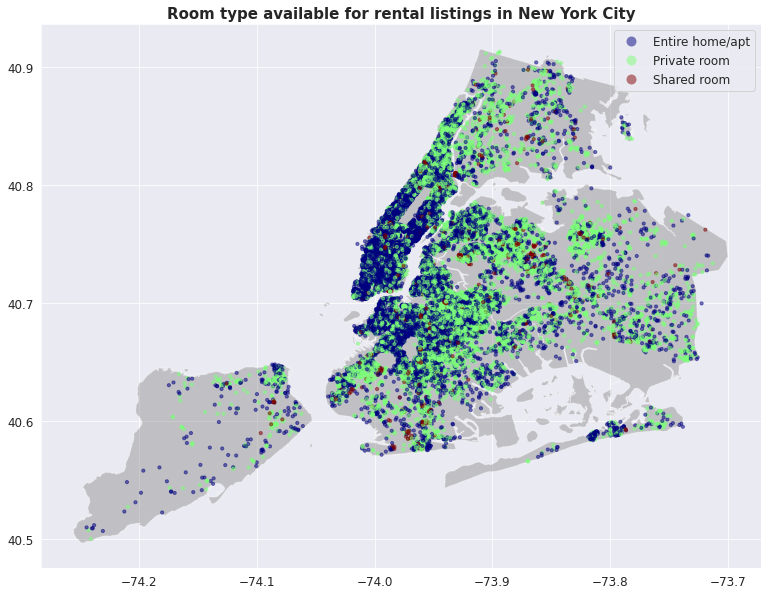

In [ ]:

fig, ax = plt.subplots(figsize = (15, 10))
street_map.plot(ax = ax, alpha = 0.4, color = "grey")
geo_df.plot(column = "room_type", ax = ax, alpha = 0.5, legend = True, markersize = 10, cmap = "jet" )
plt.title("Room type available for rental listings in New York City", fontsize = 15, fontweight = "bold")

plt.show()
#use alpha = .4

Room type distribtion - 
* entire Home/apart listing are concentrated on Manhattan and along its side.
* sharered room listing are scattered.


room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                            378           652           59
Brooklyn                        9553         10123          413
Manhattan                      13190          7973          480
Queens                          2096          3370          198
Staten Island                    176           188            9





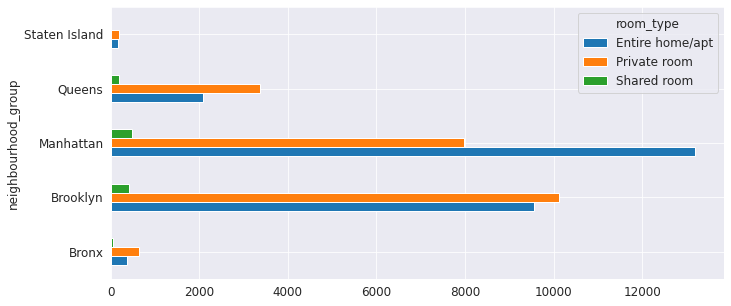

In [ ]:
# Type of room space airbnb host provides in each borough

neighbourhood_group_room_crosstab =  pd.crosstab(index = airbnb_df["neighbourhood_group"], columns = airbnb_df["room_type"])
print(neighbourhood_group_room_crosstab)
print("""

""")
neighbourhood_group_room_crosstab.plot(kind = "barh");

Observation
* Only in manhattan entire home/apt have most listing
* Listing of Private room is most in each borough except Manhattan     
* negligible shared room available in staten island


room_type            Entire home/apt  Private room  Shared room
neighbourhood_group                                            
Bronx                          100.0          53.5         40.0
Brooklyn                       145.0          65.0         36.0
Manhattan                      191.0          90.0         69.0
Queens                         120.0          60.0         37.0
Staten Island                  100.0          50.0         30.0





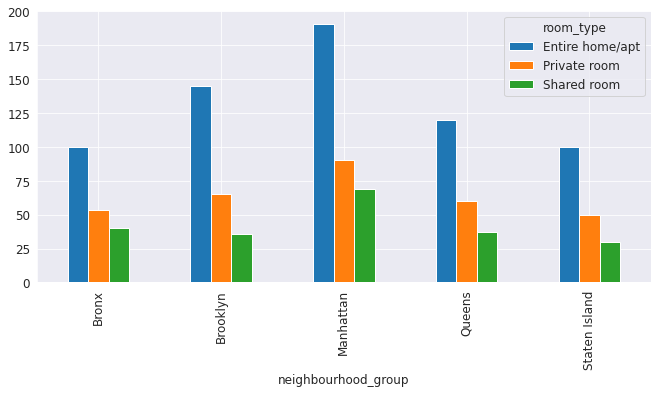

In [ ]:
# Median price of room in every borough for each room type

neighbourhood_group_room_price_pivot = pd.pivot_table(data = airbnb_df, values = "price",index = "neighbourhood_group", columns = "room_type", aggfunc = np.median)
print(neighbourhood_group_room_price_pivot)
print("""

""")

neighbourhood_group_room_price_pivot.plot(kind = "bar")

Observation:
* Manhattan is expensive for every room type
* Brooklyn have least expesive shared room
* private room have almost same price except manhattan

### <b> Hosts</b>

Top 10 most reviewed host name using host_id,no of reviews

Avg price of top 10 most reviwewed host

top 20 most reviewed nieghbourhood

least 20 reviewed host

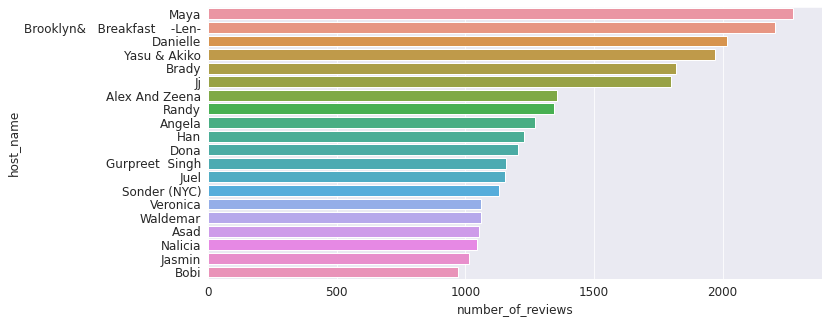

In [ ]:
most_reviewed_host = airbnb_df.groupby(['host_id', "host_name", "neighbourhood"])['number_of_reviews'].sum().sort_values(ascending=False).reset_index()[:20]
sns.barplot(x = "number_of_reviews", y = "host_name", data = most_reviewed_host)

plt.show()
# most_reviewed_hostt

In [ ]:
reviewed_host = airbnb_df.groupby(['host_id', "host_name", "neighbourhood"])['number_of_reviews'].sum().sort_values(ascending=False).reset_index() 
print("number of host having 0(ZERO) review   - ",reviewed_host[reviewed_host.number_of_reviews == 0].shape[0])

number of host having 0(ZERO) review   -  7383


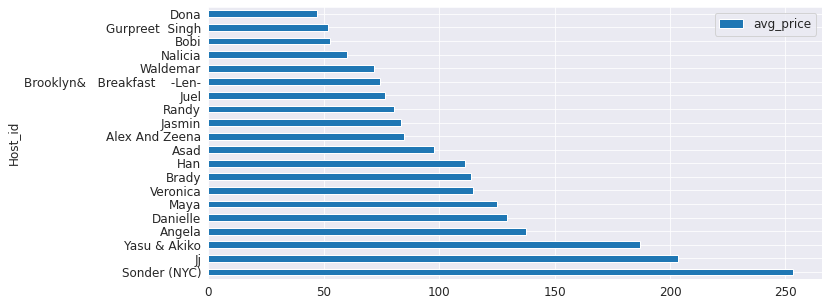

In [ ]:
#Avg price of listings of most reviewed host
l = most_reviewed_host.host_name.to_list() 
top_host_dict = {}
for elem in  l:
  avg_price=airbnb_df[airbnb_df['host_name']==elem].price.mean()
  top_host_dict[elem]=avg_price

top_host_avg_price_df=pd.DataFrame(top_host_dict.items(), columns=['Host_id', 'avg_price'])
top_host_avg_price_df.set_index('Host_id', inplace=True)
top_host_avg_price_df.sort_values(by = "avg_price",ascending=False).reset_index().plot(x = "Host_id",y = "avg_price",kind = "barh")

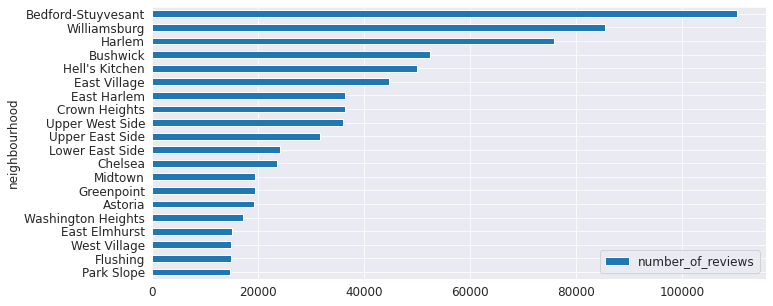

In [ ]:
busiest_host_reviews = airbnb_df.groupby(["neighbourhood_group", "neighbourhood"])['number_of_reviews'].sum().sort_values(ascending = True).reset_index().tail(20)
busiest_host_reviews.plot(x = "neighbourhood",y = "number_of_reviews",kind = "barh")

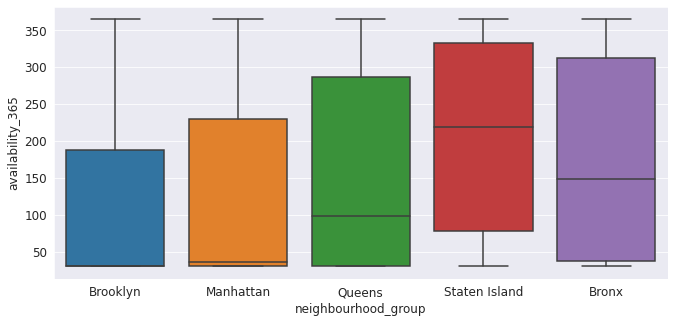

In [ ]:
# less then 0 cant intrupt this

sns.boxplot(x = "neighbourhood_group", y = "availability_365", data = airbnb_df)

From this BOXplot
* Staten island have most availibity
  1. Less available  listing
  2. People dont want to go

* Brooklyn and Manhattan have lowest availability 
  1. places are most busy
  2. people want to stay there
  3. may be host are giving less availibity

Text(0.5, 1.0, 'Correlation among Variables')

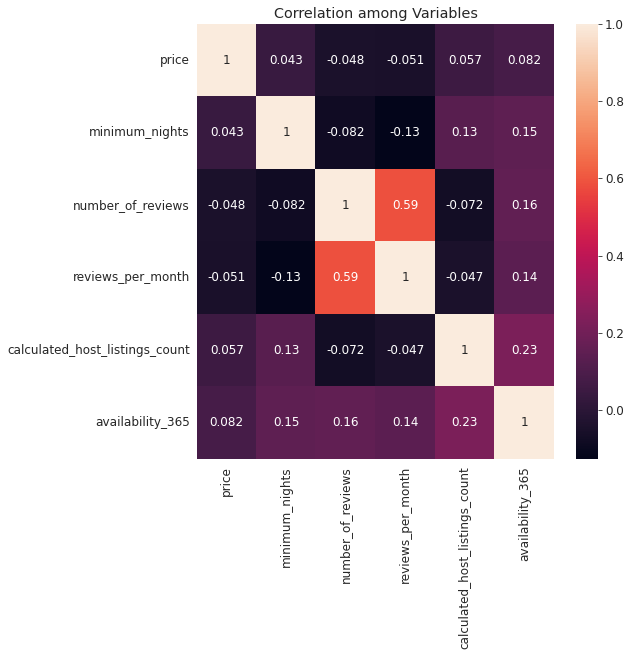

In [ ]:
col_to_check = ['price','minimum_nights', 'number_of_reviews', 'reviews_per_month','calculated_host_listings_count', 'availability_365']
corr = airbnb_df[col_to_check].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True).set_title("Correlation among Variables")


In [ ]:
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'price_category',
       'geometry'],
      dtype='object')

* lets make function which lets detail about nieghbour_group
in which we tell about -
  
  1. top 5 nieghbourhood according to number of listing count
  2. host with highest sum of reviews
  3. show listing with avg price heatmap 
  4. piechart of room_type
  5. boxplot of availibility


# Summary